# Lake Burdur over the years 2015, 2017 and 2019
# NDWI index and surface calculation
## Using Landsat and Sentinel Data


## Install required libraries

In [10]:
!pip install rasterio

## import all required libraries

In [11]:
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import rasterio.sample
from rasterio import mask
import warnings; warnings.simplefilter('ignore')

%matplotlib inline

## Define Lake Burdur area Poligon


In [12]:
def lake_burdur_32635():
    """ Lake burdur EPSG:32635 polygon."""
    return {
               "type": "Polygon",
                'coordinates': 
                                [[[764548.1266782081, 4196934.709524442],
                                 [764936.9403406535, 4167873.726825347],
                                 [795000.0, 4169741.1266483925],
                                 [795000.0, 4198487.27510955],
                                 [764548.1266782081, 4196934.709524442]]]
            }

In [13]:
def lake_burdur_32636():
    """ Lake burdur EPSG:32636 polygon."""
    return {
               "type": "Polygon",
                'coordinates': 
                            [[[236857.846627,4196889.46501],
                            [235382.90651,4167863.49462],
                            [265497.879935,4167805.37731],
                            [267340.220545,4196480.91379],
                            [236857.846627,4196889.46501]]]
            }



## Download Lake burdur tiles

In [14]:
def download_sentinel(year, dataset_download_prefix):
    band3_filename = "B03.jp2"
    band8_filename = "B08.jp2"
    get_string = dataset_download_prefix + "/" + band3_filename + " " + "SE_" + str(year) + "_" + band3_filename + " --request-payer"
    !aws s3 cp $get_string
    get_string = dataset_download_prefix + "/" + band8_filename + " " + "SE_" + str(year) + "_" + band8_filename + " --request-payer"
    !aws s3 cp $get_string
    return

download_sentinel(2015, "s3://sentinel-s2-l1c/tiles/36/S/TG/2015/7/30/0")
download_sentinel(2017, "s3://sentinel-s2-l1c/tiles/36/S/TG/2017/7/31/0")
download_sentinel(2019, "s3://sentinel-s2-l1c/tiles/36/S/TG/2019/7/31/0")

download: s3://sentinel-s2-l1c/tiles/36/S/TG/2015/7/30/0/B03.jp2 to ./SE_2015_B03.jp2
download: s3://sentinel-s2-l1c/tiles/36/S/TG/2015/7/30/0/B08.jp2 to ./SE_2015_B08.jp2
download: s3://sentinel-s2-l1c/tiles/36/S/TG/2017/7/31/0/B03.jp2 to ./SE_2017_B03.jp2
download: s3://sentinel-s2-l1c/tiles/36/S/TG/2017/7/31/0/B08.jp2 to ./SE_2017_B08.jp2
download: s3://sentinel-s2-l1c/tiles/36/S/TG/2019/7/31/0/B03.jp2 to ./SE_2019_B03.jp2
download: s3://sentinel-s2-l1c/tiles/36/S/TG/2019/7/31/0/B08.jp2 to ./SE_2019_B08.jp2


In [15]:
def download_landsat(year, dataset_download_prefix, band3_filename, band5_filename):
    wget_filename = dataset_download_prefix + "/" + band3_filename
    new_filename = "LS_" + str(year) + "_B03.TIF"
    !wget -O $new_filename $wget_filename 

    wget_filename = dataset_download_prefix + "/" + band5_filename
    new_filename = "LS_" + str(year) + "_B05.TIF"
    !wget -O $new_filename $wget_filename 
    return

download_landsat(2015, "https://landsat-pds.s3.amazonaws.com/c1/L8/179/034/LC08_L1TP_179034_20150713_20170407_01_T1", "LC08_L1TP_179034_20150713_20170407_01_T1_B3.TIF", "LC08_L1TP_179034_20150713_20170407_01_T1_B5.TIF")
download_landsat(2017, "https://landsat-pds.s3.amazonaws.com/c1/L8/179/034/LC08_L1TP_179034_20170702_20170715_01_T1", "LC08_L1TP_179034_20170702_20170715_01_T1_B3.TIF", "LC08_L1TP_179034_20170702_20170715_01_T1_B5.TIF")
download_landsat(2019, "https://landsat-pds.s3.amazonaws.com/c1/L8/179/034/LC08_L1TP_179034_20190708_20190719_01_T1", "LC08_L1TP_179034_20190708_20190719_01_T1_B3.TIF", "LC08_L1TP_179034_20190708_20190719_01_T1_B5.TIF")

--2021-03-15 17:17:41--  https://landsat-pds.s3.amazonaws.com/c1/L8/179/034/LC08_L1TP_179034_20150713_20170407_01_T1/LC08_L1TP_179034_20150713_20170407_01_T1_B3.TIF
Resolving landsat-pds.s3.amazonaws.com (landsat-pds.s3.amazonaws.com)... 52.218.234.139
Connecting to landsat-pds.s3.amazonaws.com (landsat-pds.s3.amazonaws.com)|52.218.234.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67367592 (64M) [image/tiff]
Saving to: ‘LS_2015_B03.TIF’

LS_2015_B03.TIF     100%[===================>]  64.25M  27.5MB/s    in 2.3s    

2021-03-15 17:17:44 (27.5 MB/s) - ‘LS_2015_B03.TIF’ saved [67367592/67367592]

--2021-03-15 17:17:44--  https://landsat-pds.s3.amazonaws.com/c1/L8/179/034/LC08_L1TP_179034_20150713_20170407_01_T1/LC08_L1TP_179034_20150713_20170407_01_T1_B5.TIF
Resolving landsat-pds.s3.amazonaws.com (landsat-pds.s3.amazonaws.com)... 52.218.232.34
Connecting to landsat-pds.s3.amazonaws.com (landsat-pds.s3.amazonaws.com)|52.218.232.34|:443... connected.
HTTP re

In [16]:
def surface_landsat(year):
    
    band3_filename = "LS_" + str(year) + "_B03.TIF"
    band5_filename = "LS_" + str(year) + "_B05.TIF"
    
    # import bands as separate 1 band raster
    band3 = rasterio.open(band3_filename) #green
    band5 = rasterio.open(band5_filename) #nir

    # Crop downloaded images to Lake Burdur
    geoms = [lake_burdur_32635()]
    crop_band3, out_transform_band3 = mask.mask(band3, geoms, crop=True)
    crop_band5, out_transform_band5 = mask.mask(band5, geoms, crop=True)

    # generate nir and green objects as arrays in float64 format
    green = crop_band3.astype('float64')
    nir = crop_band5.astype('float64')

    np.seterr(divide='ignore', invalid='ignore')
    ndwi=(green.astype(float) - nir.astype(float)) / (green.astype(float) + nir.astype(float)) 
    ndwi = np.nan_to_num(ndwi, nan = 0.0)
    ndwi[ndwi <= 0] = 0
    ndwi[ndwi > 0] = 1

    fig = plt.figure(figsize=(18,12))
    plot.show(ndwi)
    
    # A Landsat 8 resolution 30 x 30 per pixel 
    ndwi_pixels = ndwi.sum()
    ndwi_km2 = ndwi_pixels * 30 * 30 / 1000000 # 30 x 30 meters per pixel

    return ndwi_km2


In [21]:
def surface_sentinel(year):
    
    band3_filename = "SE_" + str(year) + "_B03.jp2"
    band8_filename = "SE_" + str(year) + "_B08.jp2"
   
    # import bands as separate 1 band raster
    band3 = rasterio.open(band3_filename) #green
    band8 = rasterio.open(band8_filename) #nir
   
    # Crop downloaded images to Lake Burdur
    geoms = [lake_burdur_32636()]
    crop_band3, out_transform_band3 = mask.mask(band3, geoms, crop=True)
    crop_band8, out_transform_band8 = mask.mask(band8, geoms, crop=True)

    # generate nir and green objects as arrays in float64 format
    green = crop_band3.astype('float64')
    nir = crop_band8.astype('float64')

    np.seterr(divide='ignore', invalid='ignore')
    ndwi=(green.astype(float) - nir.astype(float)) / (green.astype(float) + nir.astype(float)) 
    ndwi = np.nan_to_num(ndwi, nan = 0.0)
    ndwi[ndwi <= 0] = 0
    ndwi[ndwi > 0] = 1

    fig = plt.figure(figsize=(18,12))
    plot.show(ndwi)

    # A Sentinel-2 Spatial resolution for bands 3 and 8 is 10 meters: 
    ndwi_pixels = ndwi.sum()
    ndwi_km2 = ndwi_pixels * 10 * 10 / 1000000 # 10 x 10 meters per pixel.
    return ndwi_km2


LandSat:


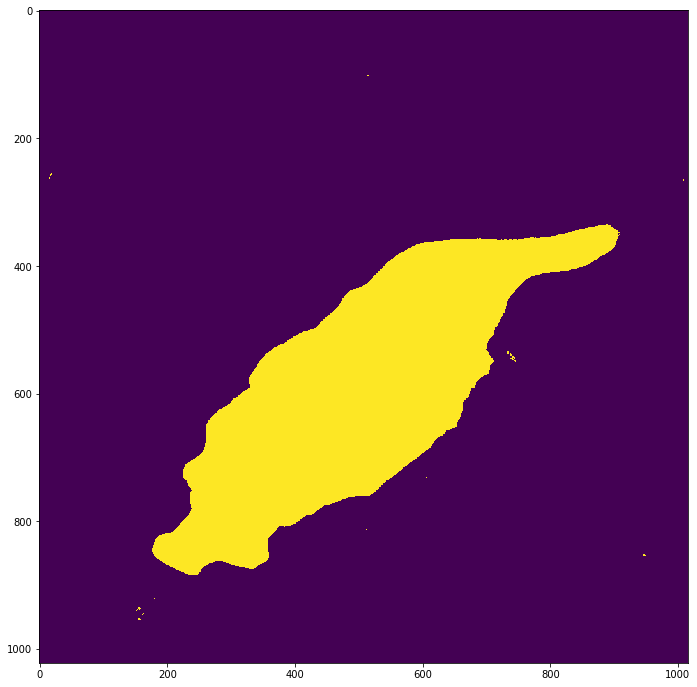

Year 2015: 137.7918 Km2


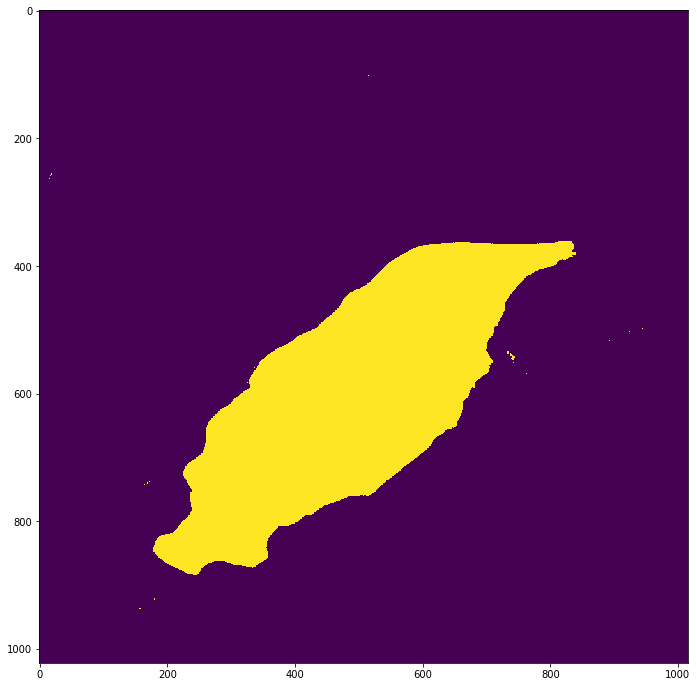

Year 2017: 130.6179 Km2


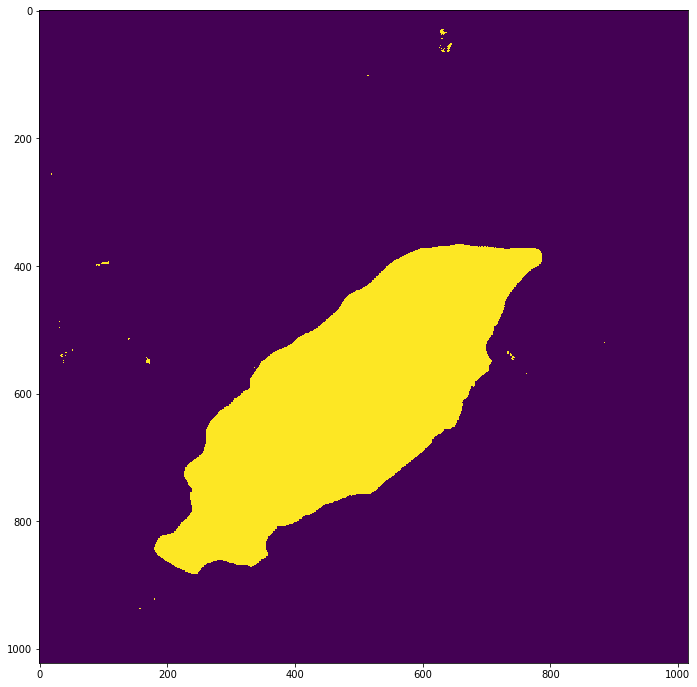

Year 2019: 126.5796 Km2
Sentinel:


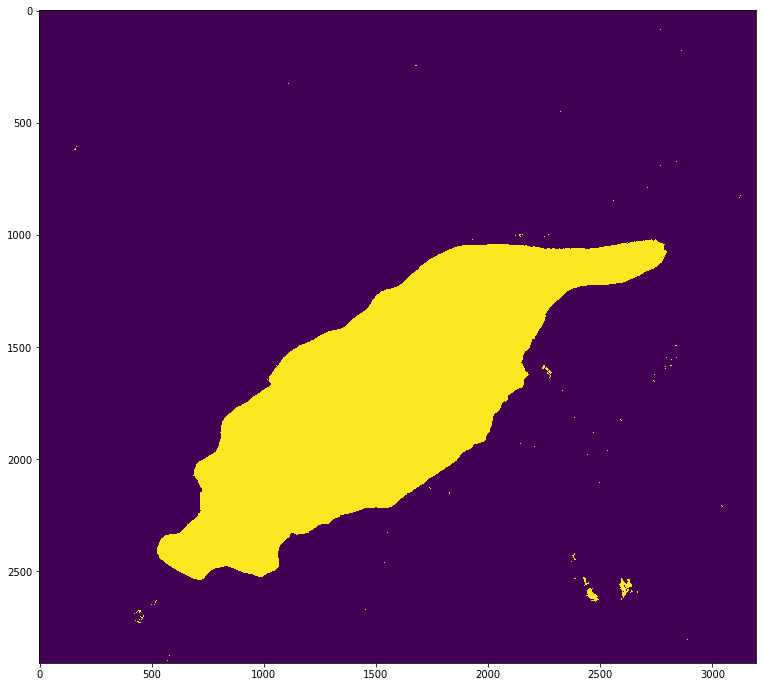

Year 2015: 137.9302 Km2


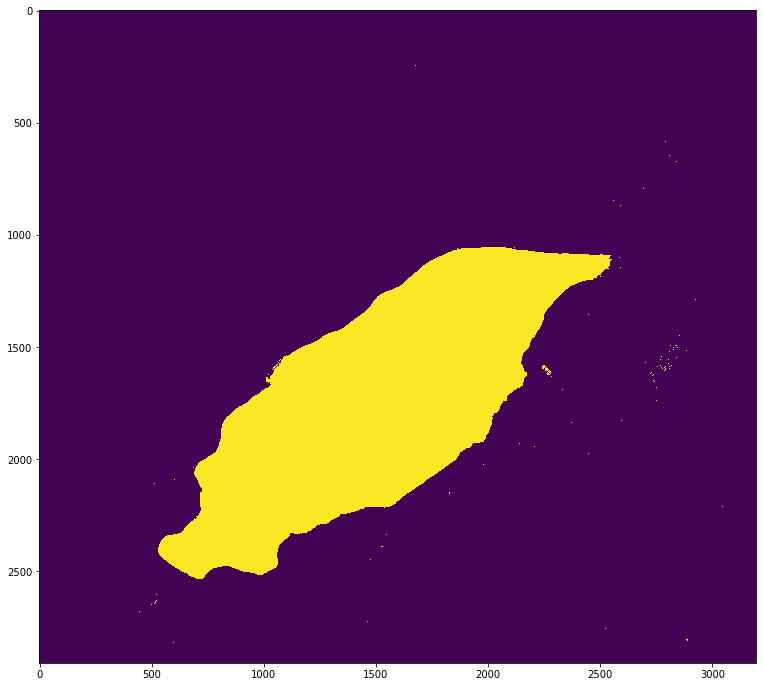

Year 2017: 130.0878 Km2


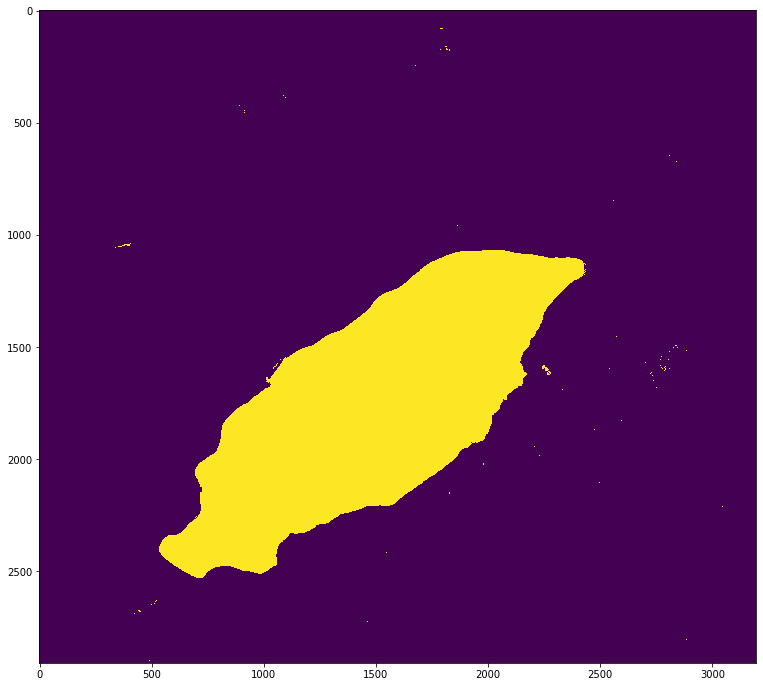

Year 2019: 126.4152 Km2


In [22]:
print("LandSat:")
print("Year {}: {} Km2".format(2015, surface_landsat(2015)))
print("Year {}: {} Km2".format(2017, surface_landsat(2017)))
print("Year {}: {} Km2".format(2019, surface_landsat(2019)))

print("Sentinel:")
print("Year {}: {} Km2".format(2015, surface_sentinel(2015)))
print("Year {}: {} Km2".format(2017, surface_sentinel(2017)))
print("Year {}: {} Km2".format(2019, surface_sentinel(2019)))
